In [525]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from IPython.display import FileLink
import pickle
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from skimage.filters import gabor, sobel, rank
from skimage.feature import hog, local_binary_pattern, ORB, canny
from sklearn.decomposition import PCA
from skimage import io
from skimage.morphology import disk
from sklearn.preprocessing import StandardScaler


import cv2 as cv
import os
import matplotlib.pyplot as plt
print('hello')


hello


In [410]:
cv2_base_dir = os.path.dirname(os.path.abspath(cv.__file__))
haar_model = os.path.join(
    cv2_base_dir, 'data/haarcascade_frontalface_default.xml')
haar_data = cv.CascadeClassifier(haar_model)


In [4]:
def kmeans(img):
    Z = img.reshape(-1)
    Z = np.float32(Z)
    criteria = (cv.TERM_CRITERIA_EPS +
                cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 8
    ret, label, center = cv.kmeans(
        Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    return res2


In [305]:
def describe(image, eps=1e-7):
    # compute the Local Binary Pattern representation
    # of the image, and then use the LBP representation
    # to build the histogram of patterns
    lbp = local_binary_pattern(image, 24,
                               8, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, 24 + 3),
                             range=(0, 24 + 2))
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    # return the histogram of Local Binary Patterns
    return hist


In [565]:
nomask_faces = []
for dirname, _, filenames in os.walk('H:\Programming\PCD_maskdetection\dataset\without_mask'):
    for filename in filenames:
        img = cv.imread(os.path.join(dirname, filename))
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        face = cv.resize(img, (50, 50))
        nomask_faces.append(face)


In [566]:
mask_faces = []
for dirname, _, filenames in os.walk('H:\Programming\PCD_maskdetection\dataset\with_mask'):
    for filename in filenames:
        img = cv.imread(os.path.join(dirname, filename))
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        face = cv.resize(img, (50, 50))
        mask_faces.append(face)


In [606]:
nomask_edges = []
nomask_hist = []
for face in nomask_faces:
    face = rank.mean_bilateral(
        face, footprint=disk(2), s0=50, s1=50
    )
    edges = sobel(face)
    face = kmeans(face)
    fd = hog(face, orientations=9, pixels_per_cell=(8, 8),
             cells_per_block=(2, 2))

    nomask_edges.append(edges)
    nomask_hist.append(fd)


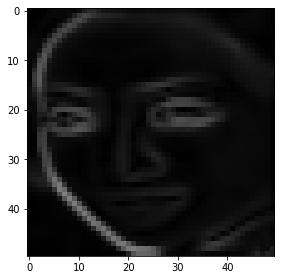

In [611]:
io.imshow(nomask_edges[55])


In [612]:
mask_edges = []
mask_hist = []

for face in mask_faces:
    face = rank.mean_bilateral(
            face, footprint=disk(2), s0=50, s1=50
    )
    edges = sobel(face)
    face = kmeans(face)
    fd = hog(face, orientations=9, pixels_per_cell=(8, 8),
                 cells_per_block=(2, 2))

        #edge = sobel(face)
    mask_edges.append(edges)
    mask_hist.append(fd)


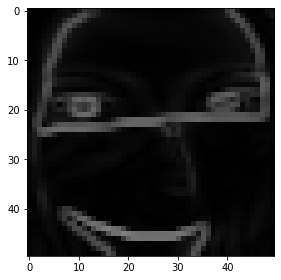

In [613]:
io.imshow(mask_edges[22])

In [614]:

a = np.array(nomask_edges)
print(a.shape)
a = a.reshape(a.shape[0], 2500)
b = np.array(nomask_hist)

np_nomask = np.concatenate((a, b), axis=1)
print(np_nomask.shape)


(1930, 50, 50)
(1930, 3400)


In [615]:
a = np.array(mask_edges)
print(a.shape)
a = a.reshape(a.shape[0], 2500)
b = np.array(mask_hist)

np_mask = np.concatenate((a, b), axis=1)
print(np_mask.shape)


(1932, 50, 50)
(1932, 3400)


In [616]:
print(np_mask.shape)

X = np.r_[np_mask, np_nomask]
labels = np.zeros(X.shape[0])

labels[np_mask.shape[0]:] = 1.0
print(labels[111])

names = {0: 'Mask', 1: 'Without Mask'}
print(X.shape)


(1932, 3400)
0.0
(3862, 3400)


In [620]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.25)
print(x_train)


[[0.00277297 0.00490196 0.00310027 ... 0.10977544 0.         0.        ]
 [0.00277297 0.0083189  0.01042171 ... 0.11873484 0.         0.        ]
 [0.01595963 0.01865323 0.01521978 ... 0.         0.         0.        ]
 ...
 [0.00392157 0.00620054 0.00876889 ... 0.         0.         0.        ]
 [0.         0.00277297 0.00277297 ... 0.01260815 0.         0.        ]
 [0.00196078 0.00876889 0.01663781 ... 0.30247983 0.12903937 0.34506897]]


In [621]:
svm = SVC(C=2, break_ties=False, cache_size=200, class_weight='balanced',
          coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
          kernel='rbf', max_iter=-1, probability=False, random_state=None,
          shrinking=True, tol=0.001, verbose=False)
svm.fit(x_train, y_train)


SVC(C=2, class_weight='balanced')

In [362]:
nn = MLPClassifier()

nn.fit(x_train, y_train)


MLPClassifier()

In [ ]:
a


In [622]:

y_pred = svm.predict(x_test)
print('svm', accuracy_score(y_test, y_pred))


svm 0.927536231884058


In [521]:
print(y_pred)


[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.

In [512]:
filename = 'model15.sav'
os.chdir('H:\Programming\PCD_maskdetection')

pickle.dump(svm, open(filename, 'wb'))


(3400,)
(1, 3400)
Without Mask


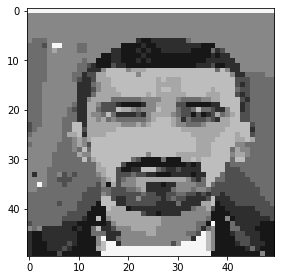

In [628]:
filename = "dataset/without_mask/450.jpg"
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
face = cv.resize(img, (50, 50))
face = rank.mean_bilateral(
    face, footprint=disk(2), s0=50, s1=50
)
edges = sobel(face)
edges = edges.reshape(2500)
face = kmeans(face)
fd = hog(face, orientations=9, pixels_per_cell=(8, 8),
         cells_per_block=(2, 2))
test = np.concatenate((edges, fd), axis=0)
print(test.shape)
test = test.reshape(1, -1)
io.imshow(face)
print(test.shape)
print(names[int(svm.predict(test))])
